In [144]:
import numpy as np 
import cv2
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [145]:
def erode_with_offset(image, kernel, offset):
  
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
   
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    output = np.zeros_like(image)
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    offset_y, offset_x = offset


    for i in range(img_height):
        for j in range(img_width):
        
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            # region_with_offset = region[offset_y:offset_y+1, offset_x:offset_x+1]
            region_point_value = region[offset_y, offset_x]
        
            if np.all(region[kernel == 1] == 1):
                output[i, j] = region_point_value
            else:
                output[i, j] = 0
                
    return output


In [158]:
def erode_image(image, kernel):
    
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    output = image.copy()
    
    for i in range(img_height):
        for j in range(img_width):
           
                region = padded_image[i:i + kernel_height, j:j + kernel_width]
          
                # if np.all(region[kernel == 0]): 
                #     output[i, j] = 0
                # else:
                #     output[i, j] = 255
                
                    
                if np.all(region[kernel == 1]):  # Якщо всі пікселі під чорними елементами ядра чорні
                    output[i, j] = 1 # Поставити чорний піксель
                else:
                    output[i, j] = 0

    return output

In [154]:
img = cv2.imread("images/rainbow.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

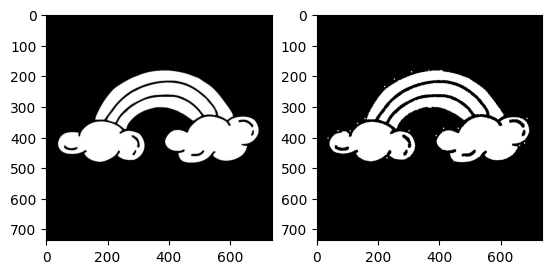

In [159]:
# kernel = np.zeros((5,5), dtype=np.uint8)
kernel = np.full((5, 5), 1)

output1 = erode_image(gray_img, kernel )

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(output1,  cmap="gray")

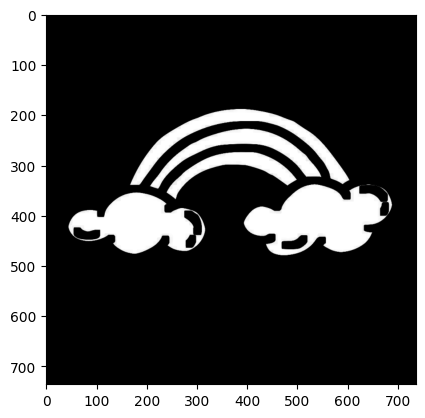

In [157]:
kernel2 = np.ones((10, 10), dtype=np.uint8)
# kernel2 = np.full((10, 10), 255)
output2 = cv2.erode(gray_img, kernel2)

plt.imshow(output2, cmap="gray")